<a href="https://colab.research.google.com/github/GabrielCdev/titanic_disaster_analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade 01

Base para a atividade: https://www.kaggle.com/competitions/titanic/data

###....:::: Membros ::::....

Áureo Ramos

Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protásio

In [1]:
# bibliotecas principais
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
# Carga dos dados .csv
titanic_df = pd.read_csv('https://raw.githubusercontent.com/GabrielCdev/titanic_disaster_analysis/main/titanic/train.csv')

In [3]:
#Verificando início dos dados
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [4]:
#Verificando final dos dados
titanic_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##Identificação de variáveis

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat - Lifeboat (if survived)

body - Body number (if did not survive and body was recovered)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Elementos contidos nos atributos

In [6]:
titanic_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
titanic_df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [9]:
titanic_df.Survived.unique()

array([0, 1])

In [10]:
titanic_df.Sex.unique()

array(['male', 'female'], dtype=object)

In [11]:
titanic_df.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [12]:
titanic_df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [13]:
titanic_df.Pclass.unique()

array([3, 1, 2])

In [14]:
titanic_df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [15]:
titanic_df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [16]:
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
titanic_df.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

##Transformação dos tipos dos atributos

In [18]:
titanic_df['Survived'] = titanic_df['Survived'].astype('boolean')
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')
titanic_df['Name'] = titanic_df['Name'].astype('string')
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
titanic_df['Cabin'] = titanic_df['Cabin'].astype('category')
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')

##Derivação de Atributo

In [19]:
# Criando uma nova coluna para Pronomes de Tratamento
titanic_df['Treatment pronouns'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df['Treatment pronouns'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Treatment pronouns, dtype: int64

In [20]:
# Criando uma nova coluna para verificar os passageiros que tinham parentes à bordo
titanic_df.insert(len(titanic_df.columns),'Relatives',np.nan)
titanic_df['Relatives'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['Relatives'] = titanic_df.Relatives.apply (lambda x: False if x == 0 else True)

In [21]:
titanic_df['Relatives'].describe()

count       891
unique        2
top       False
freq        537
Name: Relatives, dtype: object

##Eliminando colunas

Excluiremos o atributo 'PassengerId' do datase, pois ele não possui correlação/dependência com o atributo target (Survived).

Os atributos 'Age' e 'Cabin' necessitarão de tratamento, pois apresentam dados ausentes e  possuem correlação/dependência com o atributo target.

In [22]:
titanic_df.drop(columns='PassengerId', inplace=True)

In [23]:
titanic_df.loc[titanic_df["Cabin"].isin(["C23 C25 C27"])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Treatment pronouns,Relatives
27,False,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,Mr,True
88,True,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,Miss,True
341,True,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,Miss,True
438,False,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,Mr,True


In [24]:
titanic_df.drop(columns='Ticket', inplace=True)

In [25]:
titanic_df.drop(columns=['Name'], inplace=True)

In [26]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Treatment pronouns,Relatives
0,False,3,male,22.0,1,0,7.25,NaN,S,Mr,True
1,True,1,female,38.0,1,0,71.28,C85,C,Mrs,True
2,True,3,female,26.0,0,0,7.92,NaN,S,Miss,False
3,True,1,female,35.0,1,0,53.10,C123,S,Mrs,True
4,False,3,male,35.0,0,0,8.05,NaN,S,Mr,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,2,male,27.0,0,0,13.00,NaN,S,Rev,False
887,True,1,female,19.0,0,0,30.00,B42,S,Miss,False
888,False,3,female,NaN,1,2,23.45,NaN,S,Miss,True
889,True,1,male,26.0,0,0,30.00,C148,C,Mr,False


#Análise Exploratória

## Dados Nulos

In [27]:
titanic_df.isnull().sum()

Survived                0
Pclass                  0
Sex                     0
Age                   177
SibSp                   0
Parch                   0
Fare                    0
Cabin                 687
Embarked                2
Treatment pronouns      0
Relatives               0
dtype: int64

## Estatísticas Descritivas

In [28]:
titanic_df.describe()

,Survived,Age,SibSp,Parch,Fare
count,891,714.00,891.00,891.00,891.00
unique,2,NaN,NaN,NaN,NaN
top,False,NaN,NaN,NaN,NaN
freq,549,NaN,NaN,NaN,NaN
mean,NaN,29.70,0.52,0.38,32.20
std,NaN,14.53,1.10,0.81,49.69
min,NaN,0.42,0.00,0.00,0.00
25%,NaN,20.12,0.00,0.00,7.91
50%,NaN,28.00,0.00,0.00,14.45
75%,NaN,38.00,1.00,0.00,31.00


In [29]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## Gráficos para Análise

###Atributo: Relatives

In [31]:
# Setando estilo padrão de gráficos
sns.set_style("darkgrid")

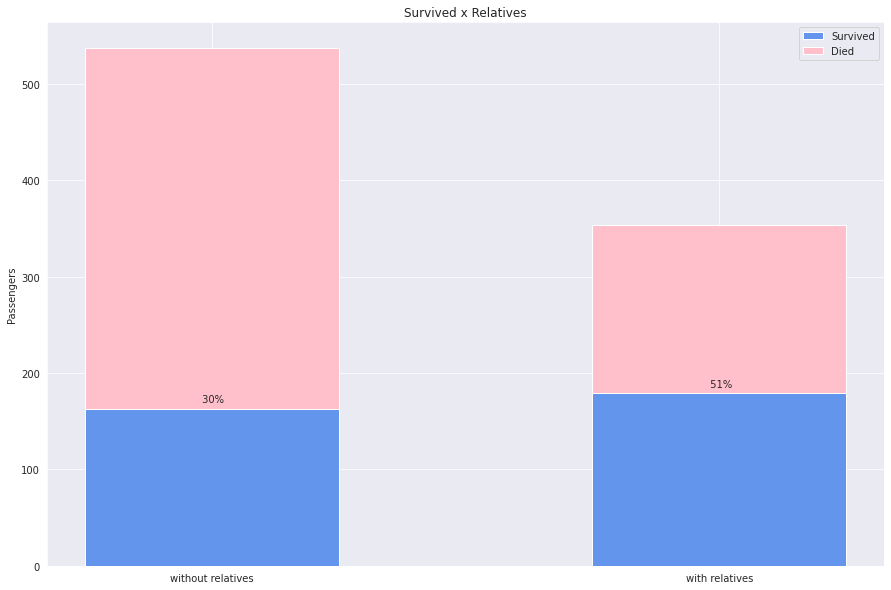

In [32]:
# Proporção de passageiros que sobreviveram e morreram agrupados de acordo com se eles tinham parentes a bordo ou não.

# Número de passageiros que sobreviveram para cada grupo (com parentes ou sem parentes a bordo)
sobreviventes = list(titanic_df.groupby(['Relatives','Survived'])['Survived'].count()[:,1])

# Número de passageiros que morreram para cada grupo.
mortos = list(titanic_df.groupby(['Relatives','Survived'])['Survived'].count()[:,0])
labels = ['without relatives','with relatives']

proporcao=[]
j=0

for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels
width = 0.5

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Relatives')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="top")

###Atributo: PClass

In [33]:
titanic_df.groupby('Survived')['Pclass'].value_counts()

Survived   
False     3    372
          2     97
          1     80
True      1    136
          3    119
          2     87
Name: Pclass, dtype: int64

In [34]:
# Função para deixar o eixo Y em formato percentual
def to_percent(y, position):
  return str(round(100*y)) + '%'

Text(0.5, 1.0, 'PClass x Survived = True')

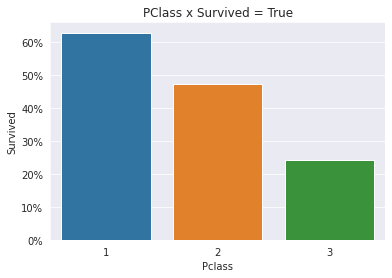

In [35]:
# Proporção de sobreviventes por classe
ax = sns.barplot(data=titanic_df, x="Pclass", y="Survived", ci=None)

ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.title('PClass x Survived = True')

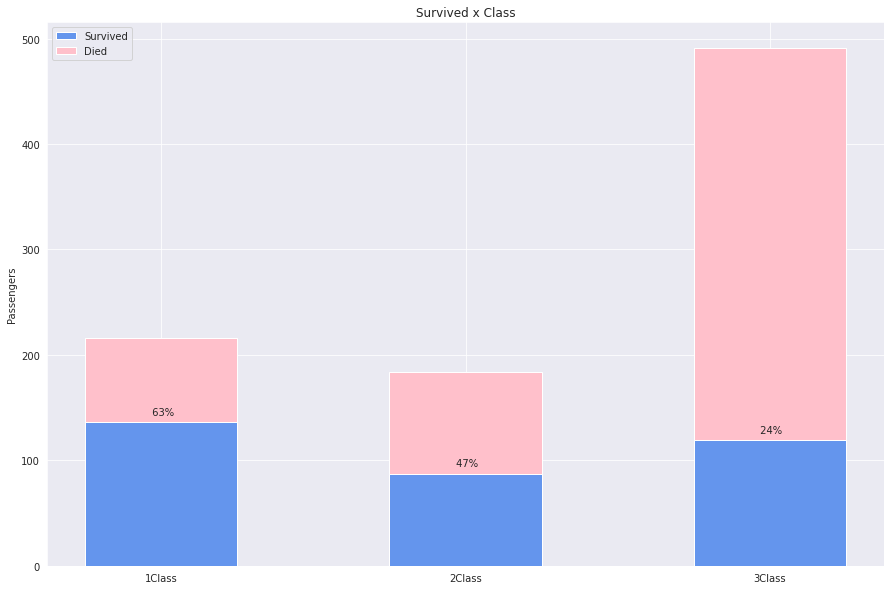

In [36]:
# Proporção de passageiros que sobreviveram e morreram agrupados de acordo com as classes (1ª, 2ª ou 3ª).
sobreviventes = list(titanic_df.groupby(['Pclass','Survived'])['Survived'].count()[:,1])
mortos = list(titanic_df.groupby(['Pclass','Survived'])['Survived'].count()[:,0])
labels = ['1Class','2Class','3Class']

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels
width = 0.5

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="top")

In [37]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count().sort_values(by='Survived')

,Pclass,Survived
1,2,184
0,1,216
2,3,491


###Atributo: Embarked

Text(0.5, 1.0, 'Embarked x Survived = True')

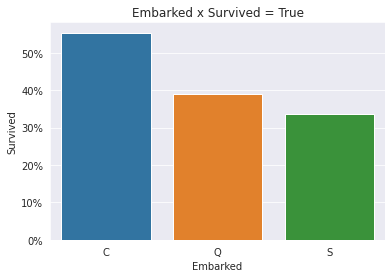

In [38]:
# Proporção de passageiros que sobreviveram mediante a cidade de embarque
ax = sns.barplot(data=titanic_df, x="Embarked", y="Survived", ci=None)
ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.title('Embarked x Survived = True')

###Atributo: Sex

Text(0.5, 1.0, 'Sex x Survived = True')

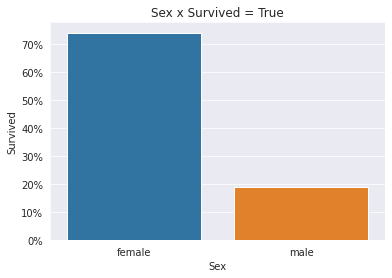

In [39]:
# Proporção de passageiros que sobreviveram baseado no sexo.
ax = sns.barplot(data=titanic_df, x="Sex", y="Survived", ci=None)

ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.title('Sex x Survived = True')

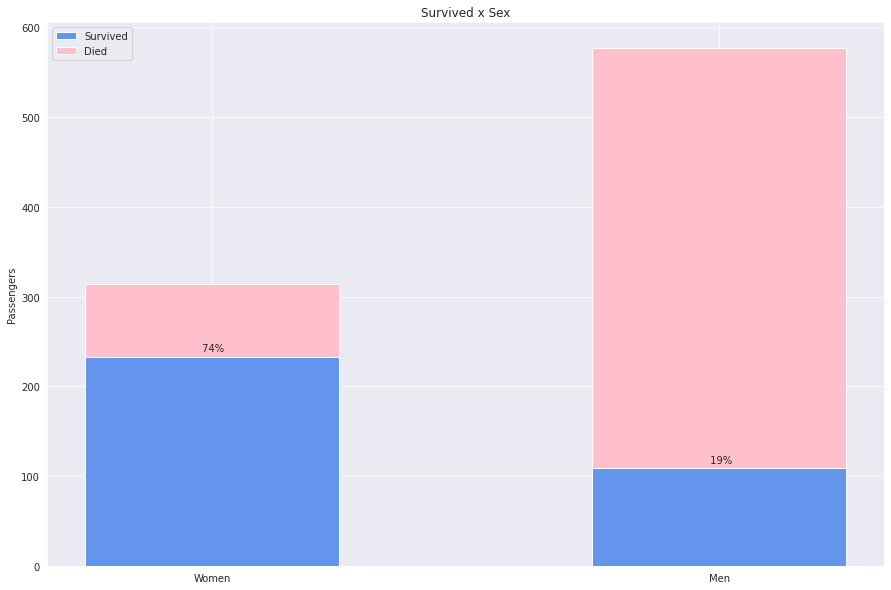

In [40]:
# Proporção de passageiros que sobreviveram e morreram agrupados de acordo com o sexo.
sobreviventes = list(titanic_df.groupby(['Sex','Survived'])['Survived'].count()[:,1])
mortos = list(titanic_df.groupby(['Sex','Survived'])['Survived'].count()[:,0])
labels = ['Women','Men'] 

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels
width = 0.5

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Sex')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="top")

###Atributo: Age

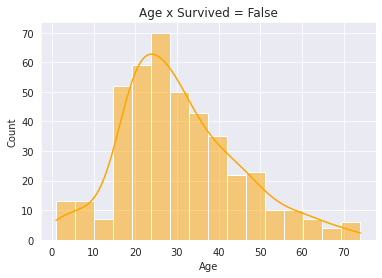

In [41]:
# Proporção de passageiros que morreram mediante a idade
survived_false = titanic_df.loc[titanic_df['Survived'] == False]

sns.histplot(data=survived_false, x='Age', kde=True, color='Orange')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age x Survived = False')

plt.show()

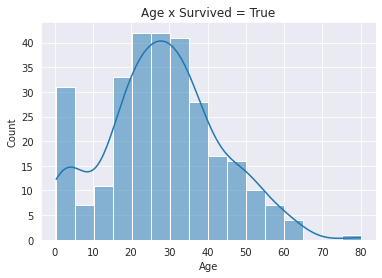

In [42]:
# Proporção de passageiros que sobreviveram mediante a idade
survived_true = titanic_df.loc[titanic_df['Survived'] == True]

sns.histplot(data=survived_true, x='Age', kde=True)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age x Survived = True')

plt.show()

## Tratamento de Dados Faltantes

In [44]:
# Verificando a média das idades baseadas em Pclass e Treatment Pronouns
titanic_df.groupby(['Pclass', 'Treatment pronouns'])['Age'].mean()

Pclass  Treatment pronouns
1       Capt                  70.00
        Col                   58.00
        Don                   40.00
        Dr                    43.75
        Jonkheer              38.00
        Lady                  48.00
        Major                 48.50
        Master                 5.31
        Miss                  30.00
        Mlle                  24.00
        Mme                   24.00
        Mr                    41.58
        Mrs                   40.88
        Ms                      NaN
        Rev                     NaN
        Sir                   49.00
        the Countess          33.00
2       Capt                    NaN
        Col                     NaN
        Don                     NaN
        Dr                    38.50
        Jonkheer                NaN
        Lady                    NaN
        Major                   NaN
        Master                 2.26
        Miss                  22.39
        Mlle                    NaN
 

In [43]:
#Completando as idades faltantes a partir da média das idades com base em Pclass e Treatment pronouns
for i in range(len(titanic_df['Age'])):
  pclass = titanic_df['Pclass'].iloc[i]
  tp = titanic_df['Treatment pronouns'].iloc[i]
  if pd.isnull(titanic_df['Age'].iloc[i]):
    titanic_df['Age'].iloc[i] = titanic_df.groupby(['Treatment pronouns','Pclass'])['Age'].mean()[tp,pclass]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Agrupamento de Idades por Classes

In [45]:
classes = [0, 5, 10, 18, 29, 100]

In [46]:
labels = ['Baby', 'Children', 'Young', 'Adults', 'Aged']

In [47]:
classes = pd.cut(x=titanic_df.Age, bins=classes, labels=labels)

In [48]:
titanic_df['Age'] = classes
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Treatment pronouns,Relatives
0,False,3,male,adults,1,0,7.25,NaN,S,Mr,True
1,True,1,female,aged,1,0,71.28,C85,C,Mrs,True
2,True,3,female,adults,0,0,7.92,NaN,S,Miss,False
3,True,1,female,aged,1,0,53.10,C123,S,Mrs,True
4,False,3,male,aged,0,0,8.05,NaN,S,Mr,False


In [49]:
pd.value_counts(titanic_df.Age)

aged        378
adults      337
young       108
baby         44
children     24
Name: Age, dtype: int64

Text(0.5, 1.0, 'Age x Survived = True')

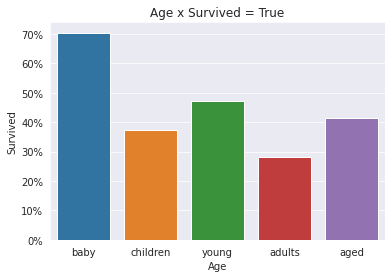

In [59]:
# Proporção de Sobreviventes baseados na Categorização das Idades
ax = sns.barplot(data=titanic_df, x="Age", y="Survived", ci=None)
ax.yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.title('Age x Survived = True')

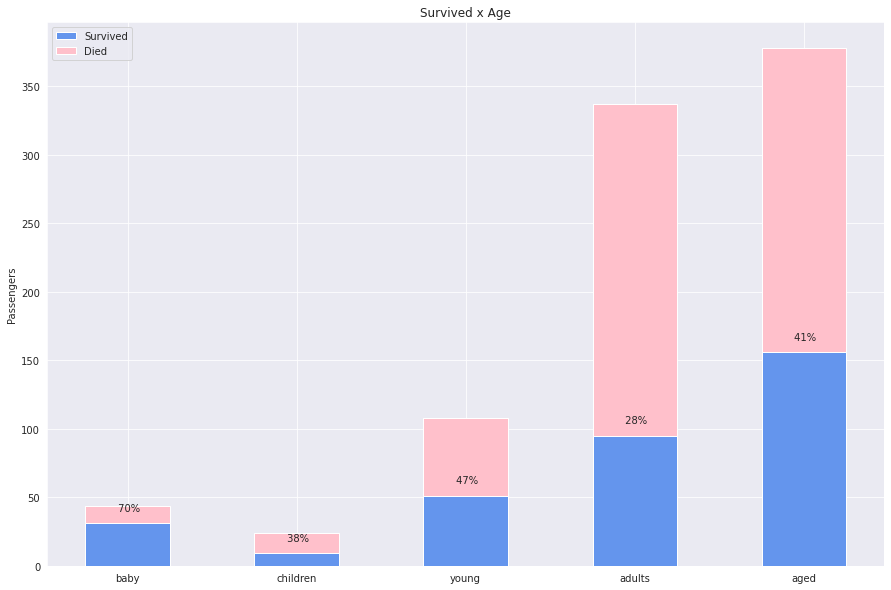

In [51]:
# Proporção de Sobreviventes e Mortos baseados na Categorização das Idades
sobreviventes = list(titanic_df.groupby(['Age','Survived'])['Survived'].count()[:,1])
mortos = list(titanic_df.groupby(['Age','Survived'])['Survived'].count()[:,0])
labels = ['baby', 'children', 'young', 'adults', 'aged']

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels #np.arange(len(labels))  # posições em x
width = 0.5  # largura das barras

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Age')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao#[f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 15, label, ha="center", va="top")

### Atributo: Fare

In [52]:
titanic_df['Fare'] = pd.cut(titanic_df['Fare'], bins=[0, 8, 15, 30, 50, 100], labels=[1,2,3,4,5])

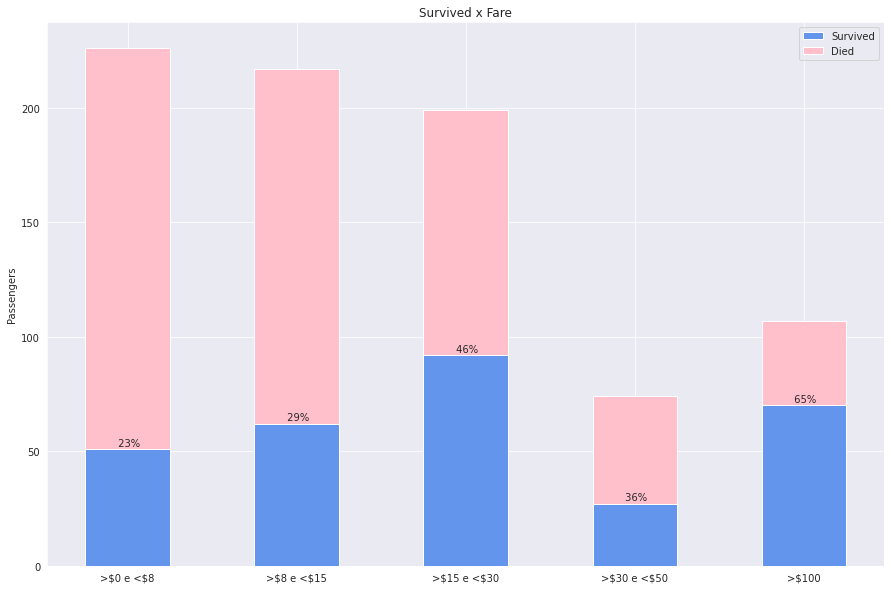

In [53]:
# Proporção de Sobreviventes e Mortos baseados nos valores pagos.
sobreviventes = list(titanic_df.groupby(['Survived','Fare'])['Survived'].count()[1])
mortos = list(titanic_df.groupby(['Survived','Fare'])['Survived'].count()[0])
labels = ['>\$0 e <\$8','>\$8 e <\$15','>\$15 e <\$30','>\$30 e <\$50','>\$100']

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels
width = 0.5

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Fare')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao#[f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="top")

###Atributo: Deck

In [54]:
#Derivação
titanic_df.insert(10, 'Deck', np.nan)
titanic_df['Deck'] = titanic_df['Cabin'].dropna().apply (lambda x: x[0])

In [55]:
titanic_df['Deck'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [56]:
titanic_df['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

In [57]:
# Por T apresentar somente 1 dado, atribuiu-se np.nan
titanic_df.loc[titanic_df.Deck=='T','Deck'] = np.nan

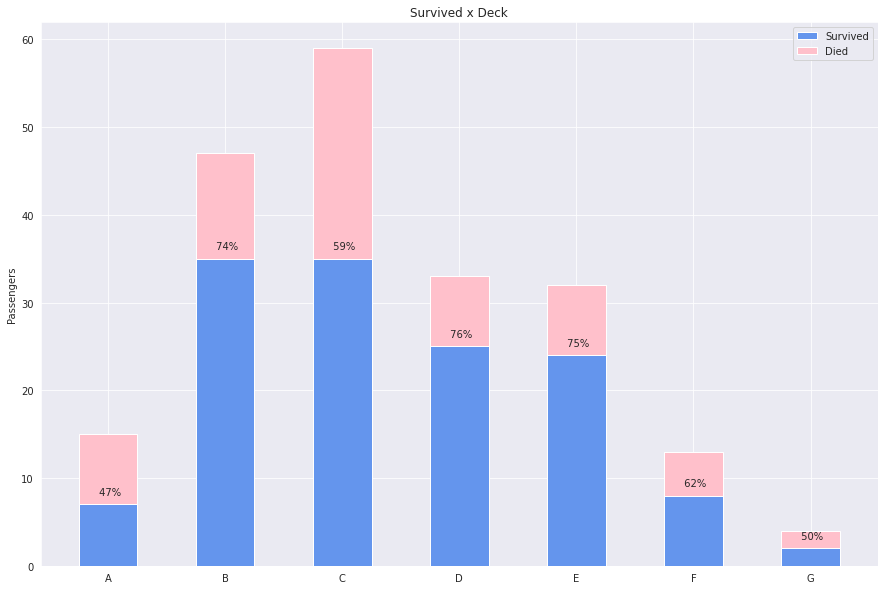

In [58]:
# Proporção de sobreviventes e mortos baseados no Deck em que estavam alocados.
sobreviventes = list(titanic_df.groupby(['Survived','Deck'])['Survived'].count()[1])
mortos = list(titanic_df.groupby(['Survived','Deck'])['Survived'].count()[0])
labels = ['A','B','C','D','E','F','G']

proporcao=[]
j=0
for i in sobreviventes:
  proporcao.append("{: .0f}%".format(100*round(i/(i+mortos[j]),2)))
  j+=1

x = labels
width = 0.5

fig, ax = plt.subplots()
ax.bar(x, sobreviventes, width, label='Survived', color = 'cornflowerblue')
ax.bar(x, mortos, width, label='Died', bottom=sobreviventes, color = 'pink')

fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_ylabel('Passengers')
ax.set_title('Survived x Deck')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

rects = ax.patches
labels = proporcao#[f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 2, label, ha="center", va="top")

Da análise do dataset titanic_train.csv, podemos inferir algumas considerações:

- Há uma quantidade razoável de dados de Idade faltantes (20%) e uma quantidade alta de dados de Cabine faltantes (77%).

- Do total de 891 induvíduos do dataset, 314 são mulheres e 577 homens.

- A taxa de sobreviventes é de aproximadamente 38%, sendo a maioria mulheres.

- A proporção de mulheres sobreviventes é maior que a dos homens (74% e 19%), respectivamente.

- Com relação à faixa etária, a prevalência é de sobreviventes crianças pequenas e bebês (< 5 anos) e mulheres acima dos 12 anos.

- É possível perceber também um equilíbrio proporcional entre sobreviventes e mortos na faixa etária de 20 a 30 anos.

- Passageiros com parentes a bordo tiveram mais chances de sobrevivência.

- Quanto mais alto o valor da tarifa, por consequência, a classe, maior a proporção de sobreviventes.

- Passageiros que embarcaram em Cherbourg foram os que mais tiveram chances de sobreviver, enquanto os que embarcaram em Southampton não.

- Passageiros que estavam na 1ª classe foram os que mais sobreviveram em relação aos passageiros de 2ª e 3ª classe.

- Passageiros que estavam nos decks B e C foram os que mais tiveram chances de sobrevivência.

- Passageiros que pagaram entre $15 e $30 e mais que $100 tiveram mais chances de sobrevivência.